<a href="https://colab.research.google.com/github/Vladislav118/test_25/blob/main/Swot_%D0%94%D0%BE%D0%B4%D0%B5%D0%BB%D0%B0%D0%BD%D0%BD%D0%BE%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#@title ФИО
print("Группа: 20БИ-3")
print("ФИО: Расчупкин Владислав Ярославович")
!ln -fs /usr/share/zoneinfo/Europe/Moscow /etc/localtime
!date

Группа: 20БИ-3
ФИО: Расчупкин Владислав Ярославович
Thu Mar 11 22:41:54 MSK 2021


In [36]:
#@title Подключение к google диску
import gspread
import os

from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread

from google.colab import drive
drive.mount('/content/drive')

print('\n', os.listdir('/content/drive/MyDrive/Colab Notebooks/swot'))
%ll -lF /content/drive/MyDrive/"Colab Notebooks"/swot/

from oauth2client.client import GoogleCredentials
gs = gspread.authorize(GoogleCredentials.get_application_default())

table = gs.open_by_key('1dRFTRj9vWIJmrmJCUoP3rsfy7aC3KV45zeQ9nhxWpUk')
print('\n', table.worksheets())

!ln -fs /usr/share/zoneinfo/Europe/Moscow /etc/localtime
print('\n')

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 ['matplot_bar_swot.png', 'WhyMusic.gsheet']
total 13
-rw------- 1 root 12367 Mar 11 22:19 matplot_bar_swot.png
-rw------- 1 root   151 Mar 11 22:37 WhyMusic.gsheet

 [<Worksheet 'Why' id:0>, <Worksheet 'strenghts' id:1659969885>, <Worksheet 'weakness' id:2033031585>, <Worksheet 'opportunities' id:1681870590>, <Worksheet 'threats' id:1717404917>]






['Сравнительно большой выбор товаров и спектр услуг\r', 'Возможность заказа', 'Наличие эксклюзивных товаров\r', 'Наличие знаний в требуемой области\r', 'Знание рынка \r', 'Прямое сотрудничество с производителями без поставщиков']
[9, 8, 9, 7, 8, 7]
[0.8, 0.7, 0.4, 0.7, 0.6, 0.4]
[7.2, 5.6, 3.6, 4.8999999999999995, 4.8, 2.8000000000000003]



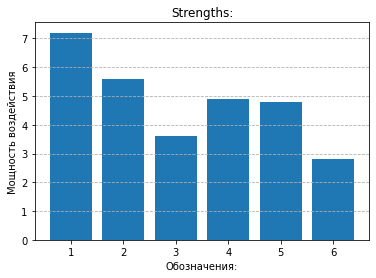

1  -  Сравнительно большой выбор товаров и спектр услуг
2  -  Возможность заказа
3  -  Наличие эксклюзивных товаров
4  -  Наличие знаний в требуемой области
5  -  Знание рынка 
6  -  Прямое сотрудничество с производителями без поставщиков


In [37]:
#@title Strength диаграмма
import matplotlib.pyplot as plt

worksheet = table.worksheet("strenghts")
rows = worksheet.get_all_values()
str_name = list()
str_importance = list()
str_probability = list()
str_power = list()

i = 0
for row in rows:
  if (i>2):
    str_name.append(row[0])
    str_importance.append(int(row[2]))
    str_probability.append(float(row[3]))
    str_power.append(int(row[2])*float(row[3]))
  i+=1
print('\n', str_name, str_importance, str_probability, str_power, sep='\n', end='\n\n')

cell_list = worksheet.range('E4:E9')
i = 0
for cell in cell_list:
    cell.value = str_power[i]
    i+=1

worksheet.update_cells(cell_list)

labels = ['1', '2', '3', '4', '5','6' ]
plt.ylabel("Мощность воздействия")
plt.xlabel("Обозначения:")
plt.title("Strengths:")
plt.bar(labels, str_power)
plt.grid(axis = 'y', linestyle = '--')
plt.show()
for i in range(str_name.__len__()):
        print(i+1, " - ", str_name[i])
        i += 1



['Необходимость больших затрат на рекламу \r', 'Необходимость аренды помещения\r', 'В наличии может не оказаться требуемого товара', 'Необходимость преобрести продукцию', 'Малое число вовлеченной аудитории', 'Высокий уровень цен']
[7, 6, 7, 7, 5, 4]
[0.5, 0.6, 0.4, 0.6, 0.5, 0.4]
[3.5, 3.5999999999999996, 2.8000000000000003, 4.2, 2.5, 1.6]



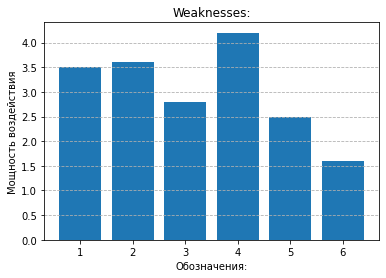

1  -  Необходимость больших затрат на рекламу 
2  -  Необходимость аренды помещения
3  -  В наличии может не оказаться требуемого товара
4  -  Необходимость преобрести продукцию
5  -  Малое число вовлеченной аудитории
6  -  Высокий уровень цен


In [38]:
#@title Weakness диаграмма
worksheet = table.worksheet("weakness")
rows = worksheet.get_all_values()
weak_name = list()
weak_importance = list()
weak_probability = list()
weak_power = list()

i = 0
for row in rows:
  if (i>2):
    weak_name.append(row[0])
    weak_importance.append(int(row[2]))
    weak_probability.append(float(row[3]))
    weak_power.append(int(row[2])*float(row[3]))
  i+=1
print('\n', weak_name, weak_importance, weak_probability, weak_power, sep='\n', end='\n\n')

cell_list = worksheet.range('E4:E8')
i = 0
for cell in cell_list:
    cell.value = weak_power[i]
    i+=1

worksheet.update_cells(cell_list)

labels = ['1', '2', '3', '4', '5', '6']
plt.ylabel("Мощность воздействия")
plt.xlabel("Обозначения:")
plt.title("Weaknesses:")
plt.bar(labels, weak_power)
plt.grid(axis = 'y', linestyle = '--')
plt.show()
for i in range(weak_name.__len__()):
        print(i+1, " - ", weak_name[i])
        i += 1



['Представить инструменты в премиум сегменте', 'Проведение тренингов', 'Создание веб сайта', 'Квалификация персонала', 'Добавление в точках продаж статистику проданных товаров', 'Выдача вуачеров , а так же накопительные и скидочные карты']
[6, 7, 6, 8, 3, 4]
[0.7, 0.8, 0.9, 0.7, 0.8, 0.9]
[4.199999999999999, 5.6000000000000005, 5.4, 5.6, 2.4000000000000004, 3.6]



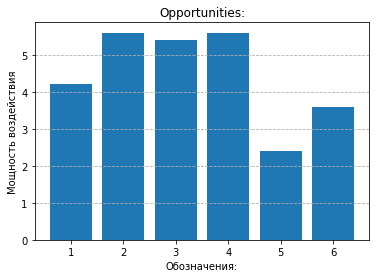

1  -  Представить инструменты в премиум сегменте
2  -  Проведение тренингов
3  -  Создание веб сайта
4  -  Квалификация персонала
5  -  Добавление в точках продаж статистику проданных товаров
6  -  Выдача вуачеров , а так же накопительные и скидочные карты


In [39]:
#@title Opportunities диаграмма
worksheet = table.worksheet("opportunities")
rows = worksheet.get_all_values()
opp_name = list()
opp_importance = list()
opp_probability = list()
opp_power = list()

i = 0
for row in rows:
  if (i>2):
    opp_name.append(row[0])
    opp_importance.append(int(row[2]))
    opp_probability.append(float(row[3]))
    opp_power.append(int(row[2])*float(row[3]))  
  i+=1
print('\n', opp_name, opp_importance, opp_probability, opp_power, sep='\n', end='\n\n')

cell_list = worksheet.range('E4:E8')
i = 0
for cell in cell_list:
    cell.value = opp_power[i]
    i+=1
worksheet.update_cells(cell_list)

labels = ['1', '2', '3', '4', '5', '6']
plt.ylabel("Мощность воздействия")
plt.xlabel("Обозначения:")
plt.title("Opportunities:")
plt.bar(labels, opp_power)
plt.grid(axis = 'y', linestyle = '--')
plt.show()
for i in range(opp_name.__len__()):
        print(i+1, " - ", opp_name[i])
        i += 1



['Отсутсвие важных частей инструмента', 'Отсутсвие заинтересованности продовца в пакупателе', 'Конкуренция', 'Относительно небольшие барьеры вступления на рынок конкурентов', 'Повышение цен на продукцию', 'Закрытые границы(отсутвие ввоза нового товара)']
[5, 7, 6, 4, 3, 6]
[0.5, 0.6, 0.2, 0.3, 0.4, 0.4]
[2.5, 4.2, 1.2000000000000002, 1.2, 1.2000000000000002, 2.4000000000000004]



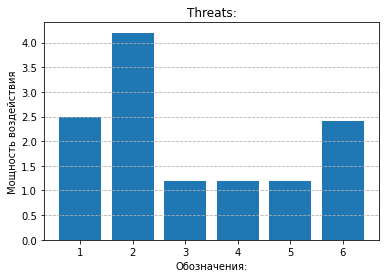

1  -  Отсутсвие важных частей инструмента
2  -  Отсутсвие заинтересованности продовца в пакупателе
3  -  Конкуренция
4  -  Относительно небольшие барьеры вступления на рынок конкурентов
5  -  Повышение цен на продукцию
6  -  Закрытые границы(отсутвие ввоза нового товара)


In [40]:
#@title Threats диаграмма
worksheet = table.worksheet("threats")
rows = worksheet.get_all_values()
thr_name = list()
thr_importance = list()
thr_probability = list()
thr_power = list()

i = 0
for row in rows:
  if (i>2):
    thr_name.append(row[0])
    thr_importance.append(int(row[2]))
    thr_probability.append(float(row[3]))
    thr_power.append(int(row[2])*float(row[3]))    
  i+=1
print('\n', thr_name, thr_importance, thr_probability, thr_power, sep='\n', end='\n\n')

cell_list = worksheet.range('E4:E8')
i = 0
for cell in cell_list:
    cell.value = thr_power[i]
    i+=1

worksheet.update_cells(cell_list)

labels = ['1', '2', '3', '4', '5', '6']
plt.ylabel("Мощность воздействия")
plt.xlabel("Обозначения:")
plt.title("Threats:")
plt.bar(labels, thr_power)
plt.grid(axis = 'y', linestyle = '--')
plt.show()
for i in range(thr_name.__len__()):
        print(i+1, " - ", thr_name[i])
        i += 1

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)

Работаем с таблицей
ls: cannot access '/content/drive/MyDrive/Colab Notebooks/fold/': No such file or directory
[['', 'Магазин музыкальных инструментов "WhyMusic"', '', '', ''], ['', '', '', '', ''], ['strength', '', '', '', ''], ['name', 'actions', 'importance', 'probability', 'power'], ['Сравнительно большой выбор товаров и спектр услуг\r', 'Расширение выбора на товар', '9', '0.8', '7.2'], ['Возможность заказа', 'Создание онлайн платформы для заказов', '8', '0.7', '5.6'], ['Наличие эксклюзивных товаров\r', 'Предворительный заказ продукта и участие в аукционах', '9', '0.4', '3.6'], ['Наличие знаний в требуемой области\r', 'Повышение квалификации сотрудников', '7', '0.7', '4.9'], ['Знание рынка \r', 'Прохождение тренингов и вебинаров сотрудников', '8', '0.6', '4.8'], ['Прямое сотрудничество с производителями без поставщиков', 'Заключение контрактов с новыми производителями', '7', '0.4', '2.8'], [

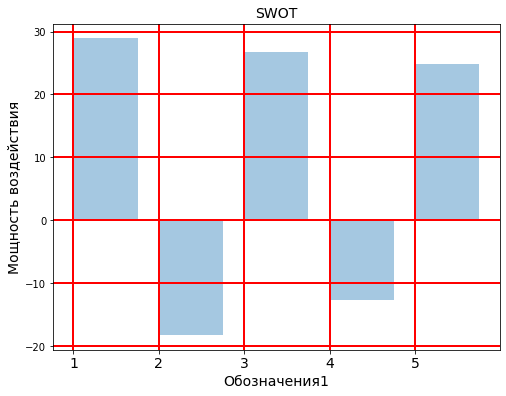

<div class="d-flex flex-row ">
<div class="card m-1" style="width: 28rem;"> <img  src="/content/drive/MyDrive/Colab Notebooks/foldr/matplot_bar_swot.png" class="card-img-top" alt="..."> <div class="card-body">
1  -  strengths ; 
2  -  weaknesses ; 
3  -  opportunities ; 
4  -  threats ; 
5  -  result ; 
</div> </div>
<div>


In [41]:
#@title Конечная диаграмма
import os
import time
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from oauth2client.client import GoogleCredentials
print('\nРаботаем с таблицей')
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/fold/
gs = gspread.authorize(GoogleCredentials.get_application_default())
os.stat('/content/drive/MyDrive/Colab Notebooks/swot/WhyMusic.gsheet')
table = gs.open_by_key('1dRFTRj9vWIJmrmJCUoP3rsfy7aC3KV45zeQ9nhxWpUk')
worksheet = table.worksheet('Why')
rows = worksheet.get_all_values()
print(rows)
strength = [0] * 6
s = 0
opportunities = [0] * 6
o = 0
weakness = [0] * 6
w = 0
threats = [0] * 6
t = 0
flag = 'strength'
for i in rows:
  if i[0] == 'strength':
    flag = 'strength'
  if i[0] == 'weakness':
    flag = 'weakness'
  if i[0] == 'opportunities':
    flag = 'opportunities'
  if i[0] == 'threats':
    flag = 'threats'
  if flag == 'strength' and i[4] != '' and i[4] != 'power':
    strength[s] = i[4]
    s = s + 1
  if flag == 'opportunities' and i[4] != '' and i[4] != 'power':
    opportunities[o] = i[4]
    o = o + 1
  if flag == 'weakness' and i[4] != '' and i[4] != 'power':
    weakness[w] = i[4]
    w = w + 1
  if flag == 'threats' and i[4] != '' and i[4] != 'power':
    threats[t] = i[4]
    t = t + 1
streng = 0
opport = 0
weak = 0
threat = 0
for i in strength:
  streng = streng + float(i)
for i in opportunities:
  opport = opport + float(i)
for i in weakness:
  weak = weak + float(i)
for i in threats:
  threat = threat + float(i)

import matplotlib.pyplot as plt
x=list()
x_float=list()
title=list()
y_float=list()
    
title = [ "strengths", "weaknesses", "opportunities", "threats", "result"]
x=title
x_float = [1, 2, 3, 4, 5]
result = streng - 1*weak + opport - 1*threat
y = [streng, weak, opport, threat]
y_float = [streng, -1*weak, opport, -1*threat,  result]
print(x_float,title,y_float)
print('списки формированы-->\n')
x_pos=list()
for i in range(x_float.__len__()):
    x_pos.append(i)
print('<!--разбивка по абсцисс и значения ординат\n', len( x_float), x_pos, y_float, ' -->\n')

fig=plt.figure(figsize=(8,6), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
plt.xticks(x_pos,  x_float, fontsize=14)
plt.xlabel('Обозначения1', fontsize=14)
plt.ylabel('Мощность воздействия', fontsize=14)
plt.title('SWOT', fontsize=14)
plt.grid(True, color='r', linestyle='-', linewidth=2)
#plt.draw()
plt.show()
fig.savefig("/content/drive/MyDrive/Colab Notebooks/swot/matplot_bar_swot.png")
print('<div class="d-flex flex-row ">')
print('<div class="card m-1" style="width: 28rem;">',
      '<img  src="/content/drive/MyDrive/Colab Notebooks/foldr/matplot_bar_swot.png" class="card-img-top" alt="...">',
      '<div class="card-body">')
    
for i in range(title.__len__()):
    print(i+1, " - ", title[i], "; ")
    i += 1
print('</div>', '</div>')
print('<div>')